# Molecular Dynamics in Python (Fall, 2020)

Prof. Bin Shan(bshan@mail.hust.edu.cn), Huazhong University of Science and Technology

Nano Materials Design and Manufacturing research center at HUST (www.materialssimulation.com)

Molecular simulations have been heralded as the new computational microscope that are helping us understand how molecules interact with each other and how they self assemble into complex structures. A molecular dynamics simulation is a particular type of simulation which generally approximates the intermolecular forces/energy using mathematical functions. The impact of temperature is often included (which usually drives molecules apart) and the interplay between this thermal energy and the intermolecular energy gives rise to the self assembly processes.

In [65]:
#DO NOT MODIFY
#Import a plotting libraries and a maths library 
import matplotlib.pyplot as plt
import numpy as np

### Excercise 1(Lennard-Jones Potential)

The potential energy of the 12-6 Lennard-Jones potential is given as
$$E_{LJ}=4\epsilon [(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^6]$$

$\sigma$ is the radius where the potential is zero and is defined as the van der waals radius. $\epsilon$ is the energy minimum of the interaction (see the figure below).

| Parameter | Ne | Ar | Kr | Xe | N |
| --- | --- | --- | --- | --- | --- |
| $\sigma$(nm) | 0.275 | 0.341 | 0.360 | 0.410 | 0.370 |
| $\epsilon(K\times k_B)$ | 36 | 120 | 171 | 221 | 95 |

[**Ref**]Hirschfelder, J.O., Curtiss, C.F., and Bird, R.B.(1954) Molecular Theory of Gases and Liquids, John Wiley & Sons,
Inc., New York. 


#### Instructions

- Plot the LJ potentials for **Ne** and **Ar** using parameters in the table
- Set axis limits to [0, 10.0, -150, 150]

#### Questions

- At what point do the Ne(red) and Ar (blue) curves cross the dotted zero line (three decimal points)?
- What is the minimum energy in eV for the Ne and Ar curves(three decimal points)?
- Which index of r corresponds to equilibrium distance(minimum energy for Ne and Ar), respectively?
- What is the ratio between equilibrium distance and $\sigma$?
- What is the interaction energy between two Ar atoms if placed 0.5 nanometer apart?


In [ ]:
# Define LJ potential
def LJ_pot(r,epsilon,sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Energy of the van der Waals interaction (eV)
    """
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6) # Lennard-Jones potential

# DO NOT MODIFY
r = np.linspace(0.1,10.0,num=20000) # Make a radius vector
epsilon_Ne = 36.0 # Ne epsilon
sigma_Ne = 2.75 # Ne sigma
epsilon_Ar = 120.0 # Ar epsilon
sigma_Ar = 3.41 # Ar sigma

# plot the LJ potential
LJ_Ne = LJ_pot(r,epsilon_Ne,sigma_Ne)
LJ_Ar = LJ_pot(r,epsilon_Ar,sigma_Ar)

# ENTER YOUR CODE HERE
# use np.argmin to get the index of the minimum energy value 
idx_Ne =  
idx_Ar =  

print("Equilibrium distance for Ne-Ne (Å): ",r[idx_Ne])
print('Equilibrium distance for Ne-Ne (in units of sigma) : %.2f' %(r[idx_Ne]/sigma_Ne) )
print("Equilibrium distance for Ne-Ne (Å): ",r[idx_Ar])
print('Equilibrium distance for Ne-Ne (in units of sigma) : %.2f' %(r[idx_Ar]/sigma_Ar) )

plt.figure(figsize=[6,6])
plt.plot(r,LJ_Ne,'r-',linewidth=2,label=r"$Ne$") # Red line is Ne
plt.plot(r,LJ_Ar ,'b-',linewidth=2,label=r"$Ar$") # Red line is Ar

#Plot formatting
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title(r"$Lennard-Jones\; potential$",fontsize=20)
plt.xlim([0.0,10])
plt.ylim([-150,150])
plt.ylabel(r"$E_{LJ}(eV)$",fontsize=20)
plt.xlabel(r"$r(Å)$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.show()

### Excercise 2 (Computing LJ force)

The force vector is defined as

$$f_{ij}=-\nabla E_{LJ}(r_{ij})$$

Using the chain rule, we first get derivative with respect to scalar $r_{ij}$ and then muptiply $\nabla r_{ij}=\dfrac{\overrightarrow{r_{ij}}}{r_{ij}}$. In one dimensional case, $\nabla r_{ij} \equiv +1$

$$f_{ij}=\frac{24\epsilon}{r_{ij}}[2(\frac{\sigma}{r_{ij}})^{12}-(\frac{\sigma}{r_{ij}})^6]\cdot \nabla r_{ij}$$

#### Instructions

- Write a function that returns the force given parameters
- Plot the force with for Ne and Ar (one dimensional case), - Set axis limits to [0, 10.0, -500, 500]

#### Questions

- What is the force at the equilibrium distance, is it close to zero?
- What is the magnitude of the most attractive force for **Ne** and **Ar**?
- What is the analytical distance for the largest attractive force in units of $\sigma$?

In [ ]:
def LJ_force(r,epsilon,sigma):
    force = 24*epsilon*(2*(sigma/r)**12-(sigma/r)**6)/r
    return force

Ne_force = LJ_force(r,epsilon_Ne,sigma_Ne)
print("Force near equilibrium distance for Ne : ", Ne_force[idx_Ne])
print("Most attractive force for Ne : ",min(Ne_force))
print("Most attractive distance for Ne-Ne (in units of sigma) : ",r[np.argmin(Ne_force)]/sigma_Ne)

# ENTER YOUR CODE HERE
Ar_force =  
print("Force near equilibrium distance for Ne : ", Ar_force[idx_Ar])
print("Most attractive force for Ar : ",min(Ar_force))
print("Most attractive distance for Ar-Ar (in units of sigma) : ",r[np.argmin(Ar_force)]/sigma_Ar)

fig, ax1 = plt.subplots(figsize=[10,6])
lns1 = ax1.plot(r,LJ_pot(r,epsilon_Ne,sigma_Ne),'r-',linewidth=2,label=r"$Ne$") # Red line is Ne
lns2 = ax1.plot(r,LJ_pot(r,epsilon_Ar,sigma_Ar),'b-',linewidth=2,label=r"$Ar$") # blue line is Ar
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
lns3 = ax2.plot(r,LJ_force(r,epsilon_Ne,sigma_Ne),'m-.',linewidth=2,label=r"$force\ Ne$") # magenta line is Ne
lns4 = ax2.plot(r,LJ_force(r,epsilon_Ar,sigma_Ar),'c-.',linewidth=2,label=r"$force\ Ar$") # cyan line is Ar

# added these three lines
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, frameon=False,fontsize=20)

ax1.set(xlim=[0.0,10.0])
ax1.set(ylim=[-150,150])
ax1.set_xlabel(r"$r(Å)$",fontsize=20)
ax1.set_ylabel(r"$E_{p}(eV)$",fontsize=20)
ax2.set(xlim=[0.0,10.0])
ax2.set(ylim=[-100,100])
ax2.set_ylabel(r"$force(eV/Å)$",fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### Excercise 3(Converting to Reduced Units)

By choosing our units we can remove any constants and get a general behaviour for all gases. Mass, sigma, epsilon and the Boltzmann constant are set to equal one. Reduced coordinates are used for the other variables which are derived from the parameters set to one. For Lenard-Jones potential, the conversion between SI unit and reduced unit are as follows (variable with * means reduced units)


$$x^* = \frac{x}{\sigma}$$
$$t^* = t\sqrt{\frac{\epsilon}{m\sigma^2}}$$
$$v^* = v\frac{t^*}{\sigma}$$
$$E^* = \frac{E}{\epsilon}$$
$$F^* = f\frac{\sigma}{\epsilon}$$
$$P^* = P\frac{\sigma^3}{\epsilon}$$
$$\rho^* = \rho\sigma^3$$
$$T^* = T\frac{k_b}{\epsilon}$$

#### Instructions

written in terms of the reduced units, the LJ potential can be expressed as

$$E^*_{LJ} = \frac{E}{\epsilon}=4[(\frac{1}{r/\sigma})^{12}-(\frac{1}{r/\sigma})^{6}]=4[(\frac{1}{r^*})^{12}-(\frac{1}{r^*})^{6}]$$

We can see that the reduced LJ potential is INDEPENDENT of details $\sigma$ or $\epsilon$ parameters. Thus in practise, people do one simulation of a **universal** MD simulation and then back convert to the orignal units to get useful information.

- Plot the LJ potential using reduced units, using $\frac{r}{\sigma}$ and $\frac{E}{\epsilon}$ as x and y axis, respectively

#### Questions

- If two Ar atoms are equilibrated at 1.12(reduced unit), what would be the real distance between these two Ar atoms?
- If two Ne atoms are equilibrated at 1.12(reduced unit), what would be the real distance between these two Ne atoms?
- If simulation of Ar system in reduced LJ unit has a density of 1.0, what would be the real density of Ar atoms (in units of $kg/m^3$)? (Hint: Lammps sets fundamental quantities such as mass, sigma, epsilon, and Boltzmann constant to 1.0 in reduced LJ unit) 
- What is the largest attractive force between two Ar atoms (in units of Newton) 

Largest attractive force in LJ units :  -2.396429031242881


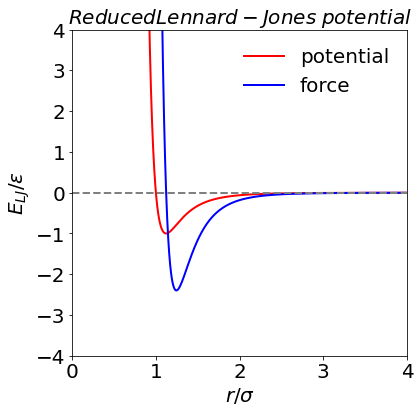

In [50]:
# Define LJ potential
def LJ_reduced_pot(r):
    return 4*((1.0/r)**12-(1.0/r)**6)

def LJ_reduced_force(r):
    return 24*(2*(1/r)**12-(1/r)**6)/r

r = np.linspace(0.1,4.0,num=20000) # Make a radius vector
# plot the LJ potential
plt.figure(figsize=[6,6])
plt.plot(r,LJ_reduced_pot(r),'r-',linewidth=2,label="potential") 
plt.plot(r,LJ_reduced_force(r),'b-',linewidth=2,label="force") 
print("Largest attractive force in LJ units : ", min(LJ_reduced_force(r)))

#Plot formatting
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title(r"$Reduced Lennard-Jones\; potential$",fontsize=20)
plt.xlim([0.0,4.0])
plt.ylim([-4,4])
plt.ylabel(r"$E_{LJ}/\epsilon$",fontsize=20)
plt.xlabel(r"$r/\sigma$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.show()

### Excercise 4(Applying Radial Cut-Off)

We don't want to compute long range interactions as they will be negligible. Plus it will be computationally expensive to calculate long range interactions in solids/periodic structures/large molecules. Thus we cut off the potential beyond a certain cut off radius $r_c$

For this excercise, let's cut off the reduced LJ potential at $r_c = 3\sigma$

There are different types of cutoff scheme that we can apply and some common ones are listed below:

- Rigid cutoff
- First derivative continuous, but not second
- Continuous to Nth order derivative

#### Instructions

- Apply the rigid shift cutoff 
- Apply the first derivative continuous cutoff
- Apply the all derivative continuous cutoff
- Compare the details of the cutoff near $r_c$


#### Questions

- What is the magnitude of the shift?
- How does the rigid shift impact the cohesive energy of LJ potential?


In [ ]:
# The cutoff and shifting value
Rcutoff = 3.0

# Rigid shift 
def LJ_rigid_shift(r,Rcutoff):
    phicutoff = LJ_reduced_pot(Rcutoff) # Shifts the potential so at the cutoff the potential goes to zero
    E_LJ_shift = LJ_reduced_pot(r) - phicutoff # Subtract the value of the potential at Rcutoff
    E_LJ_shift[r>Rcutoff] = 0.0  
    return E_LJ_shift

# First derivative continuous, not second
def LJ_first_derivative(r,Rcutoff):
    derivative_at_Rc = -LJ_reduced_force(Rcutoff)
    E_LJ_derivative = LJ_rigid_shift(r,Rcutoff)-derivative_at_Rc*(r-Rcutoff)
    E_LJ_derivative[r>Rcutoff] = 0.0 
    return E_LJ_derivative

# all derivative continuous
def LJ_continuous_derivative(r,Rcutoff):
    rs = 0.05 # rs is a small number
    E_LJ_continuous = LJ_reduced_pot(r)*np.exp(rs/(r-Rcutoff))
    E_LJ_continuous[r>Rcutoff] = 0.0 
    return E_LJ_continuous

# W(r) cutoff
def LJ_Wr(r,Rcutoff):
    # ENTER YOUR CODE HERE
    
    return E_LJ_Wr

plt.figure(figsize=[10,10])
plt.plot(r,LJ_reduced_pot(r),'r-',linewidth=2,label=r"$LJ\; pot$") # Blue line is shifted
plt.plot(r,LJ_rigid_shift(r,Rcutoff),'b-',linewidth=2,label="$rigid shift$") # Blue line is shifted
plt.plot(r,LJ_first_derivative(r,Rcutoff),'c-',linewidth=2,label="$First derivative$") 
plt.plot(r,LJ_continuous_derivative(r,Rcutoff),'m-',linewidth=2,label="$continuous derivative$") 
plt.plot(r,LJ_Wr(r,Rcutoff),'g-',linewidth=2,label="$Wr$") 

#Plot formatting
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title(r"$Types of Cutoff$",fontsize=20)
plt.xlim([2.0,3.1])
plt.ylim([-0.05,0.01])
plt.ylabel(r"$E_{LJ}/\epsilon$",fontsize=20)
plt.xlabel(r"$r/\sigma$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)

### Excercise 5 (Other Types of Pair-wise Potentials)

Besides Lenoeard Jones potential, there are other types of pair-wise interatomic potential that are widely used in molecular dynamics simulations.

### 5.1 Buckingham potential

Another commonly applied potential model is the Buckingham potential [1]. Similar to the Lennard-Jones potential, the Buckingham potential will model the attractive term with a sixth-power dependency on the distance between the two bonded particles. However, instead of a twelfth-power repulsion term an exponential function is utilised. The total Buckingham potential has the following form. It has the following analytical expression

$$V(r) = Ae^{-\lambda r}-C r^{-6}$$

#### Instructions

- Plot Buckingham potential of Ar with $\lambda= 3.66$, $A=10549.313$, and $C=63.670$[1]
- Compare the Buckingham potential of Ar to Lenard-Jones potential of Ar.

#### Questions

- What is the numerical value of Buckingham potential at r=4Å
- What is the difference of Buckingham potential and Lennard-Jones potential at r=4Å

#### References
1. Buckingham, R. A. Proc. Royal Soc. Lond. A. 1938, 168 (933), 264–283. 10.1098/rspa.1938.0173.
2. Rahman, A. Phys. Rev. 1964, 136 (2A), A405–A411. 10.1103/PhysRev.136.A405.

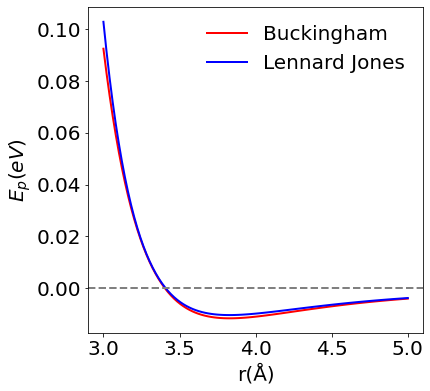

In [52]:
# Buckingham potential
def Buckingham(r,eta,A,C):
    """
    Implementation of the Buckingham potential to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    eta: float 
        lambda parameter for the interaction (1/ÅÅ)
    A: float 
        A parameter for the interaction (eV)
    C: float 
        C parameter for the interaction (eV)
        
    Returns
    -------
    float
        Energy of the van der Waals interaction
    """
    return A*np.exp(-eta*r)-C*(r**(-6)) 

# Define the force vector of Buckingham potential
def Buckingham_force(r,eta,A,C):
    if(r < Rcutoff):
        # Calculate Buckingham potential inside cutoff
        f = -eta*A*np.exp(-eta*r)+6*C*(r**(-7))
    return f

r = np.linspace(3.0,5.0,100) # Make a radius vector

plt.figure(figsize=[6,6])
plt.plot(r,Buckingham(r,3.66,10549.313,63.670),'r-',linewidth=2,label="Buckingham") 
plt.plot(r,LJ_pot(r,0.0103,3.41),'b-',linewidth=2,label="Lennard Jones")

#Plot formatting
plt.xlabel("r(Å)",fontsize=20)
plt.ylabel(r"$E_{p}(eV)$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.show()

### 5.2 Morse Potential

As we've seen that Buckingham potential has instability problem. It is desirable to the potential energy of a diatomic molecule. Morse potential was proposed by Philip M. Morse in 1929. It has the following expression

$$V(r) = D_e(1-e^{-\alpha(r-r_e)})^2$$

Here $r$ is the distance between the atoms, $r_e$ is the equilibrium bond distance, $D_e$ is the well depth (defined relative to the dissociated atoms), and $\alpha$ controls the 'width' of the potential (the smaller $\alpha$ is, the larger the well).

[Ref] P. M. Morse, Phys.Rev.34,57(1930)

#### Instructions
- Plot Morse potential with $\alpha= 6$, $re=1.5$, and $De=5$ 

#### Questions

- What is the numerical value of Morse potential at r=2Å

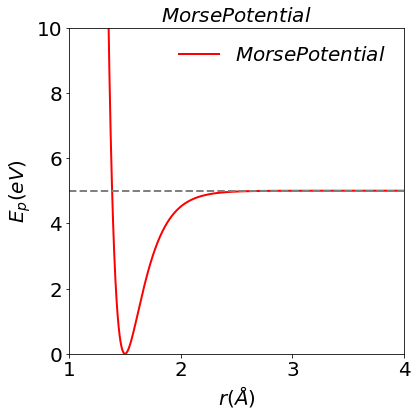

In [53]:
# Morse Potential
def Morse(r,alpha,re,De):
    return De*(1-np.exp(-alpha*(r-re)))**2

# Define the force vector of Morse Potential
def Morse_force(r,alpha,re,De):
    if(r < Rcutoff):
        # Calculate Morse Potential inside cutoff
        f = 2*alpha*De*np.exp(-alpha*(r-re))*(1-np.exp(-alpha*(r-re)))
    return f

r = np.linspace(1,5.0,num=20000) # Make a radius vector

plt.figure(figsize=[6,6])
plt.plot(r,Morse(r,6.0,1.5,5),'r-',linewidth=2,label=r"$Morse Potential$") 
plt.ylim([-500,2500])

#Plot formatting
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title(r"$Morse Potential$",fontsize=20)
plt.xlim([1,4])
plt.ylim([0,10])
plt.ylabel(r"$E_{p}(eV)$",fontsize=20)
plt.xlabel(r"$r(Å)$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(5, color='grey',linestyle='--',linewidth=2)
plt.show()

### 5.3 Charged Interactions

In addition to the van der Waals interactions, to model real chemical systems, it is also important to consider the interactions between charged species. Charged interactions are models using Coulomb’s law. One particular case is Na+ and Cl-

$$E_{coulumb}(r_{ij}) = \frac{1}{4\pi\epsilon_0}\frac{q_iq_je^2}{r_{ij}}$$

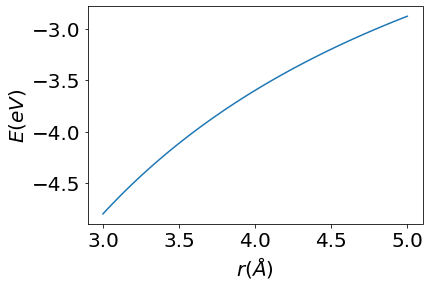

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, epsilon_0

def coulomb_energy(qi, qj, r):
    """
    Calculation of Coulomb's law.
    
    Parameters
    ----------
    qi: float
        Electronic charge on particle i
    qj: float
        Electronic charge on particle j
    r: float 
        Distance between particles i and j (Å)
        
    Returns
    -------
    float
        Energy of the Coulombic interaction (eV)
    """
    energy_joules = (qi * qj * e ** 2) / (
        4 * np.pi * epsilon_0 * r * 1e-10)
    return energy_joules / 1.602e-19

r = np.linspace(3, 5, 100)
plt.plot(r, coulomb_energy(1, -1, r))
plt.ylabel(r"$E(eV)$",fontsize=20)
plt.xlabel(r"$r(Å)$",fontsize=20)
plt.show()

### 5.4 Born-Mayer potential

$$V(r_{ij}) = A\exp(-\frac{r_{ij}}{\rho})-\frac{1}{4\pi\epsilon_0}\frac{q_iq_j}{r_{ij}}$$

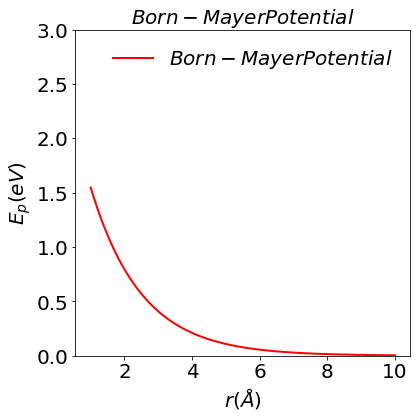

In [55]:
# Born-Mayer Potential
def Born_Mayer(r,A,rho,epsilon,qi,qj):
    return A*np.exp(-r/rho)-qi*qj/(4*np.pi*epsilon*r)

# Define the force vector of Morse Potential
def Born_Mayer_force(r,alpha,re,De):
    if(r < Rcutoff):
        # Calculate Morse Potential inside cutoff
        f = -A*np.exp(-r/rho)/rho+qi*qj/(4*np.pi*epsilon*(r**2))
    return f

r = np.linspace(1,10,num=20000) # Make a radius vector

plt.figure(figsize=[6,6])
plt.plot(r,Born_Mayer(r,3.0,1.5,10,-1,+1),'r-',linewidth=2,label=r"$Born-Mayer Potential$") 
plt.ylim([-500,2500])

#Plot formatting
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title(r"$Born-Mayer Potential$",fontsize=20)
plt.ylim([0,3])
plt.ylabel(r"$E_{p}(eV)$",fontsize=20)
plt.xlabel(r"$r(Å)$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(10, color='grey',linestyle='--',linewidth=2)
plt.show()

### 5.5 Bonds

van der Waals and charged interactions is useful for the study of non-covalent materials. However, to truely probe the chemistry of a system we must also be able to model the bonded interactions. The potential energy of the bonded interactions of a system is usually made up of bonds, angles, dihedrals, and other higher order processes,

$$ E_{\text{bonded}} = E_{\text{bond}}(b) + E_{\text{angle}}(\theta) + E_{\text{dihedral}}(\phi) + \ldots . $$

The bond lengths are typically modelled with a harmonic potential energy function, 

$$ E_{\text{bond}}(\mathbf{r}) = \frac{K_b}{2}(b - b_0)^2, $$

where, $b_0$ is the equilibrium bond length and $K_b$ is the force constant for the bond. 

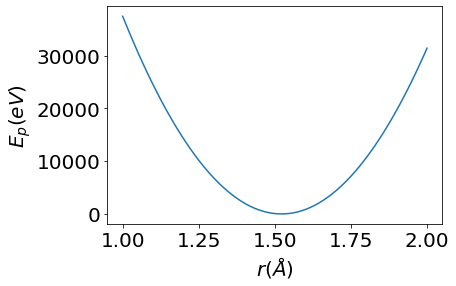

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def bonded(kb, b0, b):
    """
    Calculation of the potential energy of a bond.
    
    Parameters
    ----------
    kb: float
        Bond force constant (units: eV/Å^2)
    b0: float 
        Equilibrium bond length (units: Å)
    b: float
        Bond length (units: Å)
    
    Returns
    float
        Energy of the bonded interaction
    """
    return kb / 2 * (r - b0) ** 2

r = np.linspace(1, 2, 100)
plt.plot(r, bonded(274965.16, 1.522, r))
plt.ylabel(r"$E_{p}(eV)$",fontsize=20)
plt.xlabel(r"$r(Å)$",fontsize=20)
plt.show()

### Excercise 6 (Force field parameterization)

All of the non-bonded (van der Waals and Coulomb) and each of the bonded interactions are collected together in a potential model or a forcefield. These are usually a file or files that contain all of the information required to calculate the potential energy for the given system in any structural configuration.

Once the potential energy function to be used for a particular interaction has been determined, it is then necessary to parameterise the function.



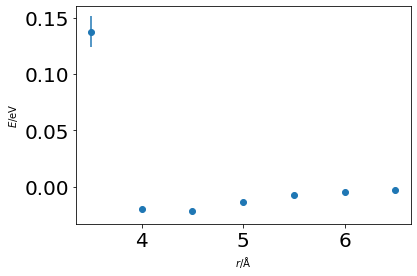

In [59]:
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(3.5, 7., 0.5)
energy = np.array([0.1374, -0.0195, -0.0218, 
                   -0.0133, -0.0076, -0.0043, 
                   -0.0025])
energy_err = energy * 0.1

plt.errorbar(r, energy, yerr=energy_err, 
             marker='o', ls='')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.show()

#### Instructions
Assume that we solved quantum mechanically interatomic potential at a range of inter-atom separations, from 2 to 5 Å. The Python code below plots the energy against distance from a quantum mechanical calculation.

#### Questions
- What is the inter-atomic distance that corresponds to the lowest energy according to the fitting results? 

Best value for ε = 2.02e-02 eV
Best value for σ = 3.81 Å


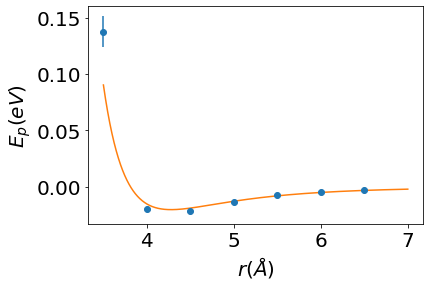

In [63]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(LJ_pot, r, energy,sigma=energy_err)
print('Best value for ε = {:.2e} eV'.format(popt[0]))
print('Best value for σ = {:.2f} Å'.format(popt[1]))

plt.errorbar(r, energy, yerr=energy_err, marker='o', ls='')
x = np.linspace(3.5, 7, 1000)
plt.plot(x, LJ_pot(x, popt[0], popt[1]))
plt.ylabel(r"$E_{p}(eV)$",fontsize=20)
plt.xlabel(r"$r(Å)$",fontsize=20)
plt.show()